## Docs

In [1]:
!pip3 install tkseem

### Frequency Tokenizer

In [2]:
import tkseem as tk

Read, preprocess then train

In [3]:
tokenizer = tk.WordTokenizer()
tokenizer.train('samples/data.txt')

Training WordTokenizer ...


Tokenize 

In [4]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

Encode as ids

In [5]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[557, 798]


Decode back to tokens

In [6]:
decoded = tokenizer.decode(encoded)
print(decoded)

['السلام', 'عليكم']


In [7]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

السلام عليكم


### SentencePiece Tokenizer

Read, preprocess then train

In [8]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.train('samples/data.txt')

Training SentencePiece ...


Tokenize 

In [9]:
tokenizer.tokenize("صباح الخير يا أصدقاء")

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

Encode as ids

In [10]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[1799, 2741]


Decode back to tokens

In [11]:
decoded = tokenizer.decode(encoded)
print(decoded)

['▁السلام', '▁عليكم']


In [12]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

 السلام عليكم


### Morphological Tokenizer

Read, preprocess then train

In [13]:
tokenizer = tk.MorphologicalTokenizer()
tokenizer.train()

Training AutoTokenizer ...


Tokenize 

In [14]:
tokenizer.tokenize("السلام عليكم")

['ال', '##سلام', 'علي', '##كم']

Encode as ids

In [15]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[2, 367, 764, 184]


Decode back to tokens

In [16]:
decoded = tokenizer.decode(encoded)
print(decoded)

['ال', '##سلام', 'علي', '##كم']


### Random Tokenizer

In [17]:
tokenizer = tk.RandomTokenizer()
tokenizer.train('samples/data.txt')

Training RandomTokenizer ...


In [18]:
tokenizer.tokenize("السلام عليكم أيها الأصدقاء")

['ا', '##لسلام', 'علي', '##كم', 'أ', '##يها', 'الأ', '##صدقاء']

### Disjoint Letter Tokenizer

In [19]:
tokenizer = tk.DisjointLetterTokenizer()
tokenizer.train('samples/data.txt')

Training DisjointLetterTokenizer ...


In [20]:
print(tokenizer.tokenize("السلام عليكم أيها الأصدقاء"))

['ا', '##لسلا', '##م', 'عليكم', 'أ', '##يها', 'ا', '##لأ', '##صد', '##قا', '##ء']


### Character Tokenizer

In [21]:
tokenizer = tk.CharacterTokenizer()
tokenizer.train('samples/data.txt')

Training CharacterTokenizer ...


In [22]:
tokenizer.tokenize("السلام عليكم")

['ا', '##ل', '##س', '##ل', '##ا', '##م', 'ع', '##ل', '##ي', '##ك', '##م']

### Export Models

Models can be saved for deployment and reloading.

In [23]:
tokenizer = tk.WordTokenizer()
tokenizer.train('samples/data.txt')
tokenizer.save_model('freq.pl')

Training WordTokenizer ...
Saving as pickle file ...


load model without pretraining

In [24]:
tokenizer = tk.WordTokenizer()
tokenizer.load_model('freq.pl')

Loading as pickle file ...


In [25]:
tokenizer.tokenize('السلام عليكم')

['السلام', 'عليكم']

### Benchmarking

In [27]:
import seaborn as sns
import pandas as pd
import time 

def calc_time(fun):
    start_time = time.time()
    fun().train('samples/data.txt')
    return time.time() - start_time

running_times = {}

running_times['Word'] = calc_time(tk.WordTokenizer)
running_times['SP'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Disjoint'] = calc_time(tk.DisjointLetterTokenizer)
running_times['Character'] = calc_time(tk.CharacterTokenizer)

Training WordTokenizer ...
Training SentencePiece ...
Training RandomTokenizer ...
Training DisjointLetterTokenizer ...
Training CharacterTokenizer ...


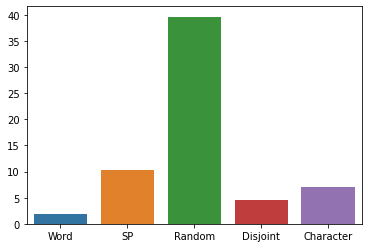

In [28]:
sns.barplot(data = pd.DataFrame.from_dict([running_times]))